In [1]:
import os
import h5py as h5
import numpy as np
import nrrd
import matplotlib.pyplot as plt

In [44]:
# file_seg = "../data/160_10-layer/volumes/00/160_10-layer_00_predictions.nrrd"
file_raw = "/Volumes/LaCie 1/scratch/160_10-layer/volumes/00/160_10-layer_00.h5"

assert os.path.exists(file_raw)

In [45]:
vol = {}
vol_config = {}
vol_hist = {}
with h5.File(file_raw,"r") as f:
    print(f.keys())
    for key in f.keys():
        print(key)
        if key == "raw":
            vol[key] = f[key][:]
            print(f[key].shape)
            print(f[key].nbytes/1024**2)
            print(f[key].dtype)
        if key == "volume_data":
            group = f[key]
            for subkey in group.keys():
                subarray = group[subkey][...]
                vol_config[subkey] = subarray

<KeysViewHDF5 ['raw', 'volume_data', 'volume_histogram_data']>
raw
(500, 2300, 2300)
5044.9371337890625
uint16
volume_data
volume_histogram_data


In [46]:
raw = vol["raw"]

In [47]:
raw.dtype

dtype('uint16')

In [48]:
for key in vol_config.keys():
    print(key,":",vol_config[key])

Datatype : b'uint16'
HistogramUpToDate : True
Max : 65535
Min : 0
Offset : 347.095
Scale : 10.9314
SizeX : 2300
SizeY : 2300
SizeZ : 500
UsedBits : 16
VoxelSizeX : 0.020618
VoxelSizeY : 0.020618
VoxelSizeZ : 0.020618


In [49]:
data = raw

In [50]:
# convert the data form uint16 to float 32
data = data.astype(np.float32)
print(data.nbytes/1024**2)
#normalize the data range 0-1
data = (data - data.min()) / (data.max() - data.min())
## convert to uint8 data range 0:255
data = (data*255).astype(np.uint8)
# data = raw_data

10089.874267578125


In [51]:
print(data.nbytes/1024**2)

2522.4685668945312


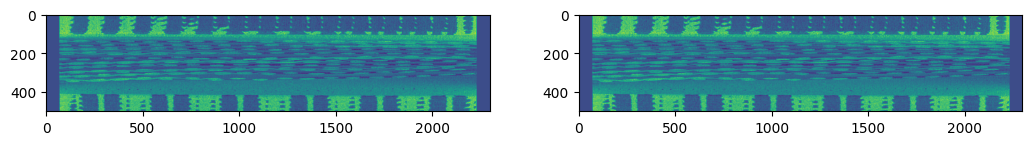

In [52]:
fig,axs = plt.subplots(1,2,figsize=(2*6.3,6.3))

axs = axs.flatten()

slice =30

axs[0].imshow(raw[:,slice,:])
axs[1].imshow(data[:,slice,:])

In [40]:
data_type = numpy_dtype_to_nrrd_dtype(data.dtype)
print(data_type)

unknown


In [53]:
vol_config["Datatype"] = data.dtype.name

In [54]:
out = {}
out['raw'] = data
# print(volume_data.dtype)
out['volume_data'] = vol_config


fout = os.path.join("160_10-layer_00_uint8"+".h5")
with h5.File(fout, 'w') as fout:
    for key in out.keys():
        if key == "volume_data":
            volume_group = fout.create_group('volume_data')
            for key, value in vol_config.items():
                volume_group.create_dataset(key, data=value)
        else:
            fout.create_dataset(key, data = out[key])